# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT_WEEK1/Project_FOOD_HUB/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

##### The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape # Checking the shape of the dataframe

(1898, 9)

#### Observations:
##### The dataset has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
##### All columns have 1898 observations, so there are no missing values.
##### The is 1 float, 4 integres and and 4 objects.
##### Order_id and costumer_id are categorical variables but have labeled as integres.
##### The variables restaurante_name, cuisine_type, day_of_week and rating  should be categorical variables

In [ ]:
# Having a closer look at all categorical variables
# Making a list of all categorical variables
cat_col = ["restaurant_name", "cuisine_type", "day_of_the_week", "rating"]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())

    print('-' * 50) # its creating the -----

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------
cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64
--------------------------------------------------
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64
--------------------------------------------------
rating
N

In [ ]:
###### Observations:
####### The data set includes 178 reataurantes, 14 types of cusine.
####### Demand in much higher during the weekend and most orders are not rated.

In [ ]:
# Change the data types of order_id and customer_id

df = df.astype({ "order_id": object, "customer_id": object})

# Confirm that data type has changed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# Checking missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
##### There are no missing values in the data set, but as noted previouslly most orders do not have a rating.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Look at summary statistics of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


####Observations:
#####There is a total of 1898 observations.
#####Average cost of a order is 19.50 dollars with a minimum value of 4.47 dollars and maximum of 35.41 dollars.
##### **Food preparation** takes an **average of 27.37 minutes** , with **minimum** and **maximum** time preparation being **20.00** and **35.00** minutes, respectively.
#####Delivery time takes on average 24.16 minutes with a minimum and maximum time of 15.00 and 33.00 minutes, respectively.


In [ ]:
# Look at summary statistics of categorical variables
df.describe(exclude = 'number').T

,count,unique,top,freq
order_id,1898,1898,1477147,1
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


####Observations:
#####The most frequent customer is customer 52832.
#####The Shanke Shack restaurant has higher orders when compared to all other restaurantes.
#####The American cusine is the type of food most ordered.
#####Most orders are placed during the weekend and most customer do not  provide a rating.  

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Checking the number of observation in each rating category.
df.rating.value_counts( dropna = False)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
df.rating.value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

####Observations:
#####A total of 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####**Explore the numerical variables**


In [ ]:
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box,ax_hist) = plt.subplots( #create a figure (f) with two subplots (ax_box and ax_hist)
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

#####**Observations on cost of orders**

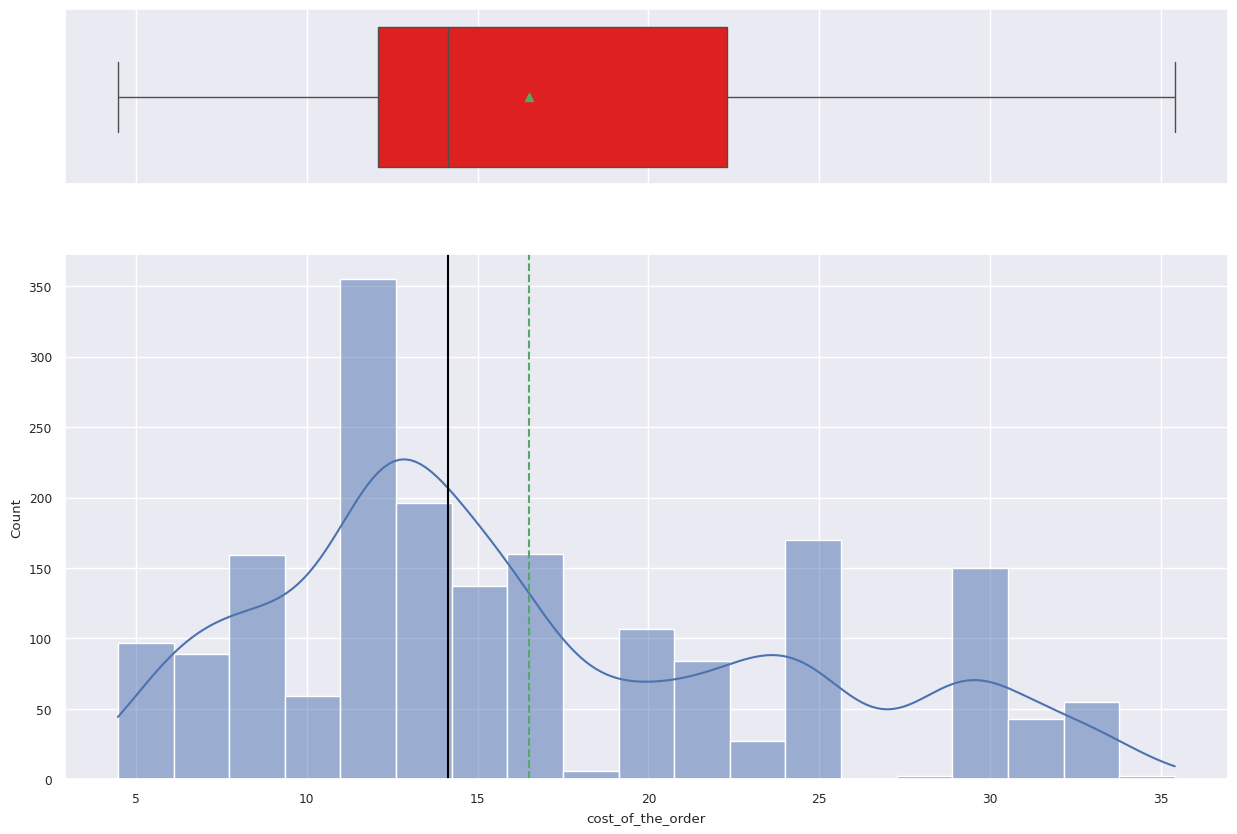

In [ ]:
histogram_boxplot(df.cost_of_the_order)

####Observations:
#####The models show that the distrubition of cost of orders is right-skewed
#####The median cost of order is ~14 dollars and mean is ~17 dollars.
#####Most orders are costing arround 11 dollars to 12 dollars. Also, the KDE in histogram shows two additional picks around 25 dollars  and 30 dollars  that will need further consideration.
#####The minumn  cost of order is ~ 4 dollars and maximum cost of order is ~35 dollars.


#####**Observations on food preparation time**

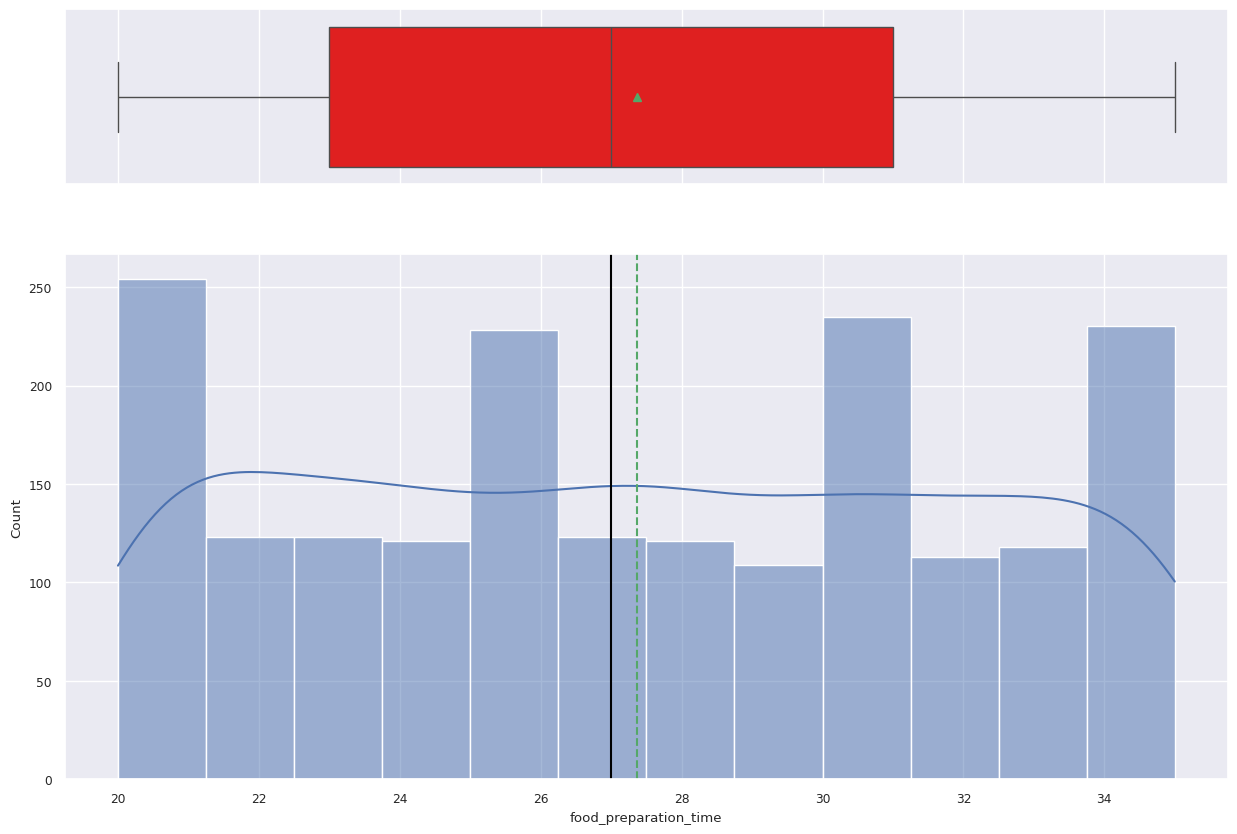

In [ ]:
histogram_boxplot(df.food_preparation_time)

#### Observations:

##### The food preparation time has a uniform distribution, indicating that there is an equitable even distribution of the time it takes to prepare a meal(between 20 to 35 minutes) with an average of ~27.5 minutes. However, there are 4 peaks arround 20, 26, 31 and 34 minutes indicating that the most ordered foods take a similar time to prepare and contrasting with less ordered foods. Thus,  indicating that there are custers of preparation time for both popular and less ordered dishes, highlighting patterns in the time it takes to prepare different types of meals ( popular vs less ordered).  

##### Note: food preparation time is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation

#####**Observations on delivery time**

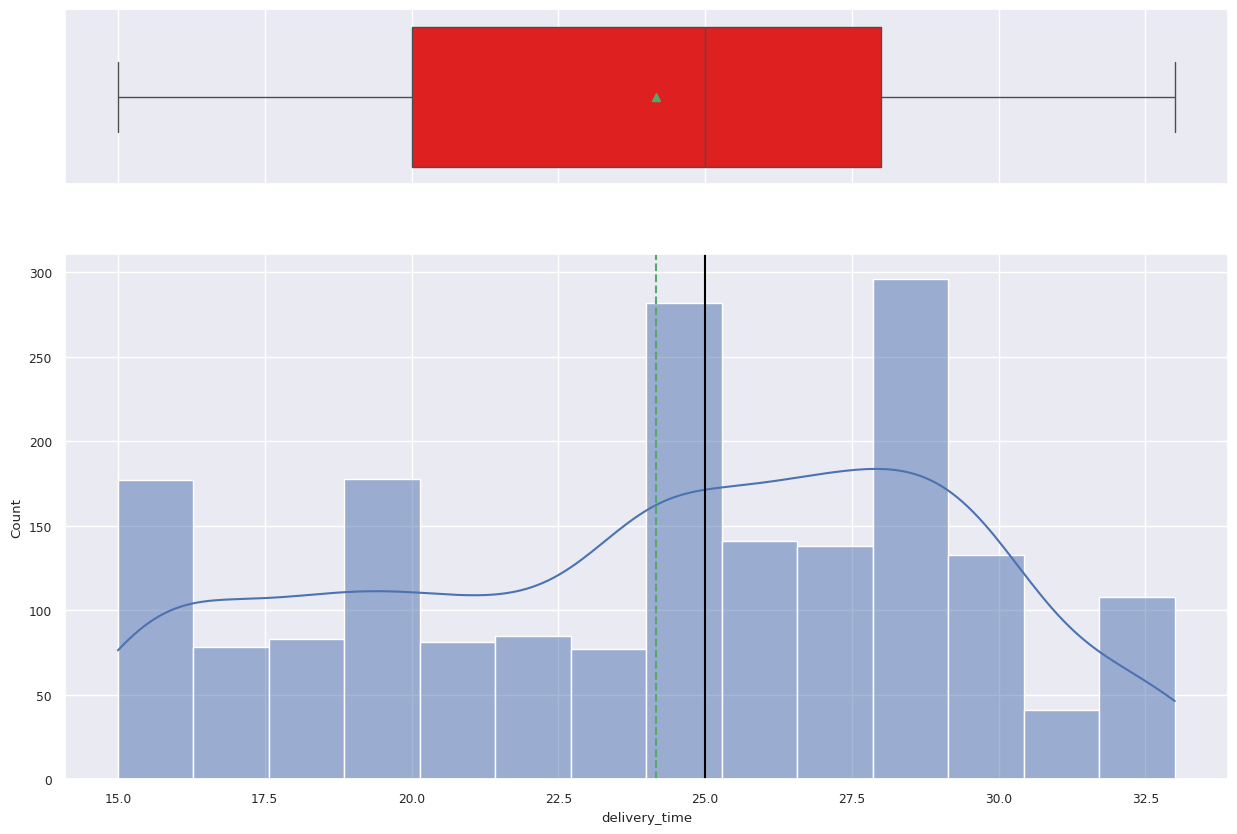

In [ ]:
histogram_boxplot(df.delivery_time)

####Observations:
#####The distribution of delivery time left skewed, indicating that most deliveries take longer durations.
#####Mean delivery time is ~24 minutes and median is 25 minutes, indicating a tendency towards longer delivery durations.
#####Minimum delivery time in 15 minutes and max delivery time is 33 minutes
#####There are pronounced delivery times at 16, 19, 25 and 29 minutes, This might sugest that most ordered foods are clustered at particular locations.Time of delivery might be influenced by delivery routes.
#####Note:delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

####**Explore the categorical variables.**

**Observations on Restaurant name**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


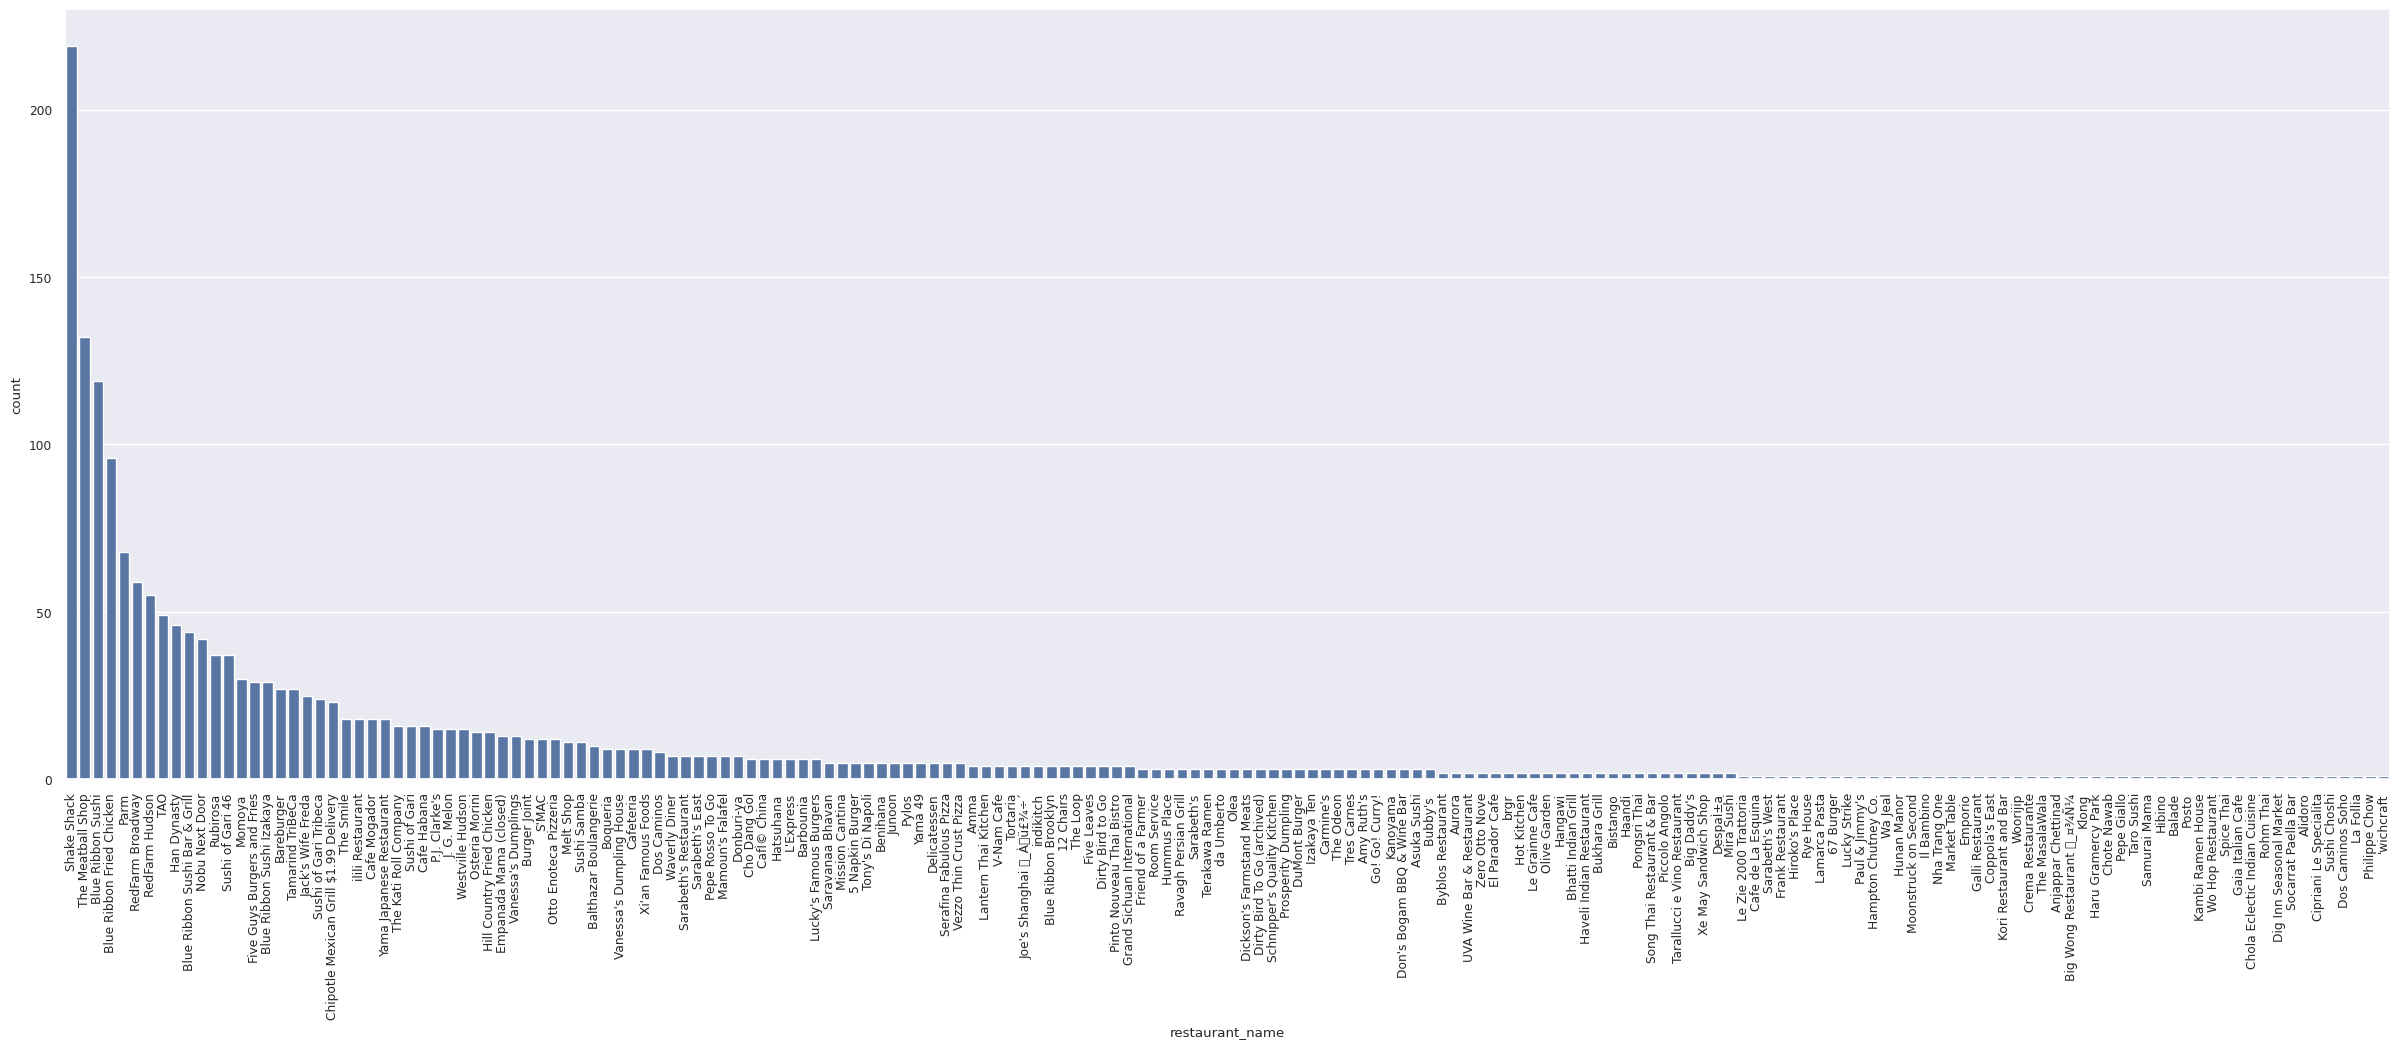

In [ ]:
plt.figure(figsize = (30, 10))# Setting figure size
sns.set(font_scale=0.8) # Setting font size
sns.countplot(data=df, x="restaurant_name",order = df.restaurant_name.value_counts().index)# Creating plot
plt.xticks(rotation = 90)# Rotating X-axis labels
plt.show()
print('\n')

In [ ]:
df.restaurant_name.value_counts( dropna = False) # Count restaurante name

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

####Observations on restaurante name:
#####There are observations for 178 restaurantes
#####Most popular restaurante is the "Shake Shack" (219 orders), followed by the "The Meatball Shop" (132 orders ), in third there is the "Blue Ribbon Sushi" (119 orders)

#####**Observations on Cuisine type**

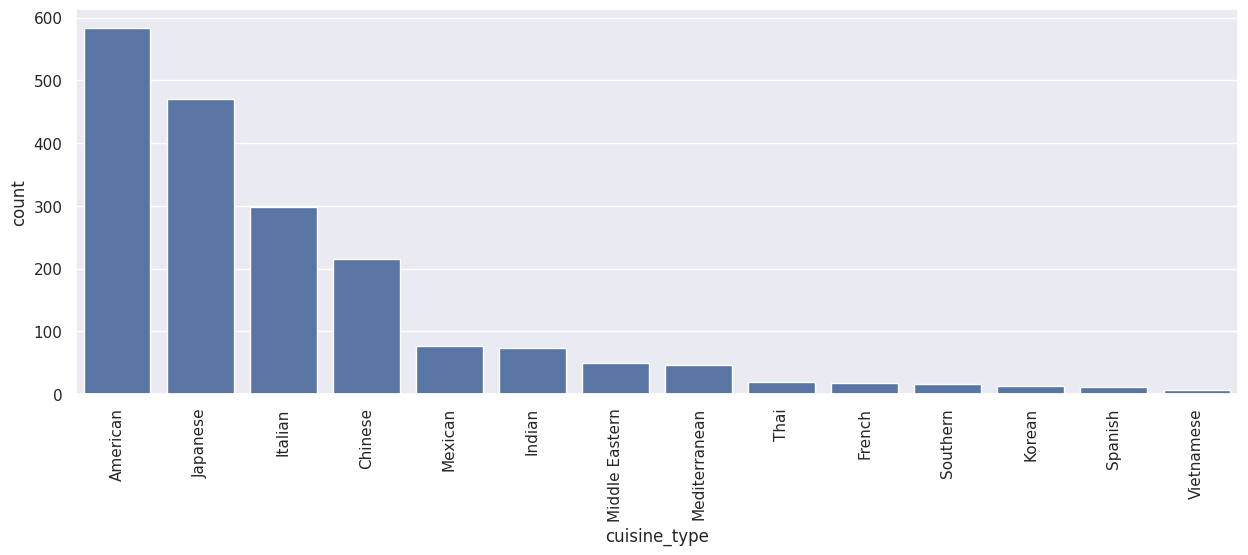

In [ ]:
# Plot the numbers of order by Cuisine Type
sns.set(style='darkgrid')
plt.figure(figsize = (15, 5))
sns.countplot(data=df, x="cuisine_type",order = df.cuisine_type.value_counts().index)
plt.xticks(rotation=90)
plt.show()
print('\n')

####Observations on cusine type:
#####The most **common ordered cusine type is American**, followed by Japanese and in third place there is Italian cusine.   

**Observations on day of the week**

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

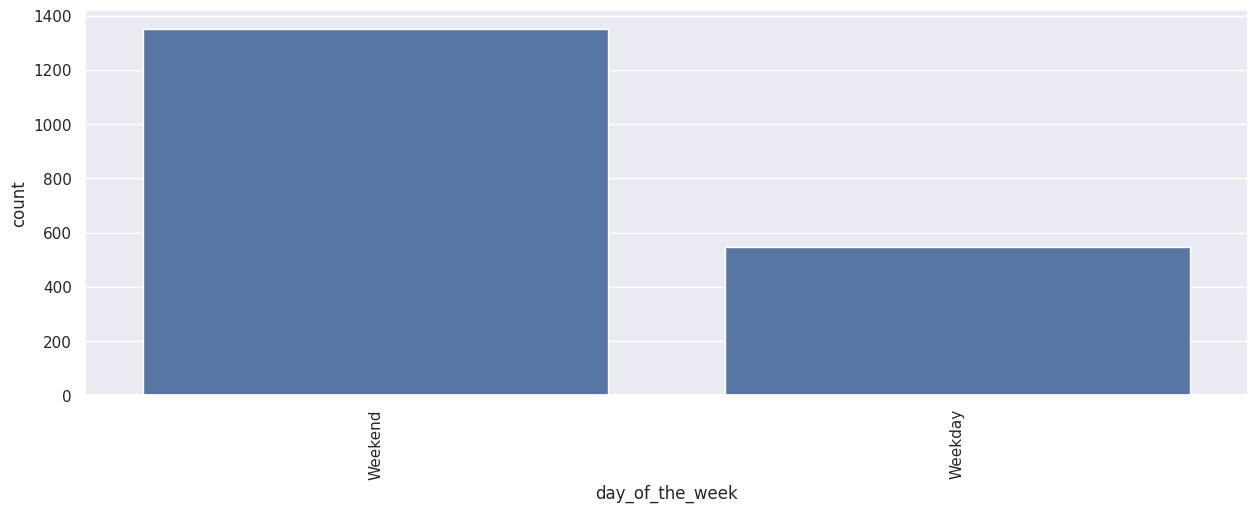

In [ ]:
# Plot the numbers of order by day of the week
sns.set(style='darkgrid')
plt.figure(figsize = (15, 5))
sns.countplot(data=df, x="day_of_the_week",order = df.day_of_the_week.value_counts().index)
plt.xticks(rotation=90)

####Observations on the day of the week
#####Most orders are placed during the weekend

**Observations on ratings**

<Axes: xlabel='rating', ylabel='count'>

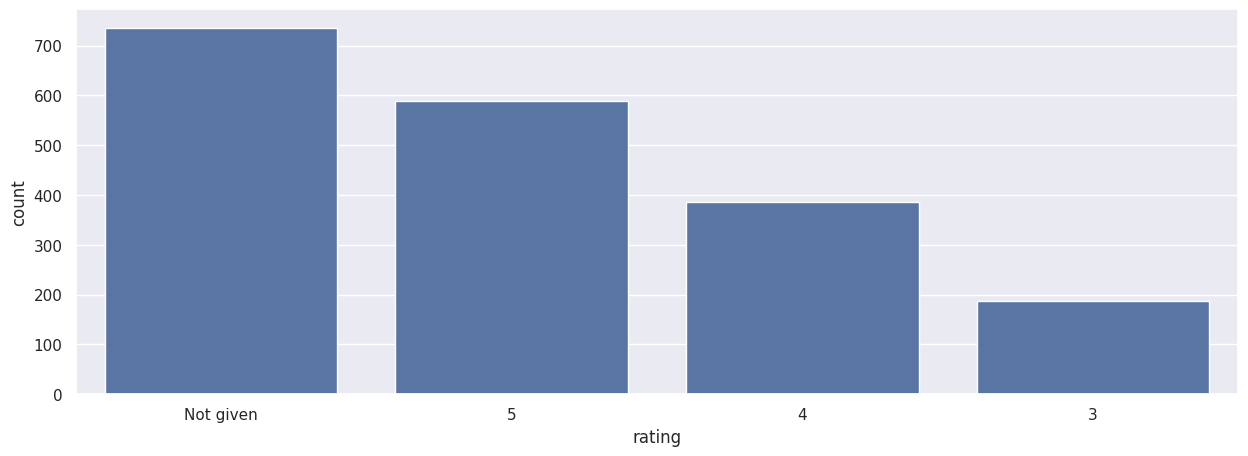

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize = (15, 5))
sns.countplot(data=df, x="rating",order = df.rating.value_counts().index)

####Observations on rating
#####Most orders are not rated, the majority of rated orders are rated 5.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code herer
df.restaurant_name.value_counts( dropna = False).nlargest(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

####Observations:
#####The top 5 restaurantes in terms of orders recived are the "Shake Shack" , "The Meatball Shop", "Blue Ribbon Sushi", "Blue Ribbon Fried Chicken" and the "Parm" with 219, 132, 119, 96, and 68 orders,respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# From variable "day_of_the_week" select  "weekend" values, grouped by cousine type and count. Sort values by order_id from higher to lower.
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False)


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53
Indian,49,49,49,49,49,49,49,49
Mediterranean,32,32,32,32,32,32,32,32
Middle Eastern,32,32,32,32,32,32,32,32
Thai,15,15,15,15,15,15,15,15


#### Observations:
#####he most popular cuisine on weekends is the American cuisine.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders that cost more than 20 dollars
total_orders=df.cost_of_the_order.count() # Count total number of orders
orders_above_20=len(df[df.cost_of_the_order>20]) # count total number of orders above 20
percentage_of_orders_above_20= (orders_above_20/total_orders)*100 # calculate the percentage of orders above 20
print('Percentage of orders that cost more than 20 dollars is:', round(percentage_of_orders_above_20,2)) # Print percentage of orders above 20 with 2 decimal places

Percentage of orders that cost more than 20 dollars is: 29.24


#### Observations:
###### The percentage of orders that cost more than 20 dollars is 29.24 percent.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
print("The mean delivery time is", round(df.delivery_time.mean(),2), "minutes") # Print the mean delivery time with 2 decimal spaces.

The mean delivery time is 24.16 minutes


#### Observations:
#####The mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
print(df.groupby(['customer_id'])['order_id'].count().nlargest(10))

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
82041      7
259341     7
276192     7
60052      6
97079      6
Name: order_id, dtype: int64


#### Observations:
##### The top most frequent customes are:

*   Customer 52832 (13 orders)
*   Customer 47440 (10 orders)
*   Customer 83287 (9 orders)


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### **Perform multivariate analysis to explore relatioships between numeric variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


#### **Correlation among numeric variables**

<ipython-input-82-f7b9a22d44ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['rating'] = pd.to_numeric(df_numeric['rating'])


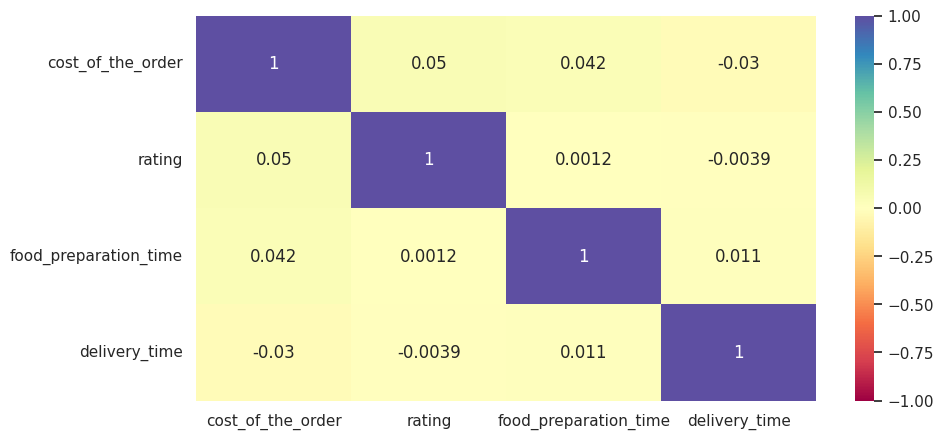

In [ ]:
# Write the code here
# Creat a data frame with only numeric varibles, will consider ratings as  numeric variable.
df_numeric = df[["cost_of_the_order", "rating", "food_preparation_time","delivery_time"]]
# Change rating "Not given" to zero and convert to a integrer
df_numeric.loc[df_numeric['rating'] == 'Not given', 'rating'] = '0'
df_numeric['rating'] = pd.to_numeric(df_numeric['rating'])
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1) # creat plot
plt.show()

####Observations on correlations among numeric variables
#####There seems to be no correlation among "cost of the order", "rating", "food preparation time" and delivery time"

#### **Observations on Cuisine type by day of the week**

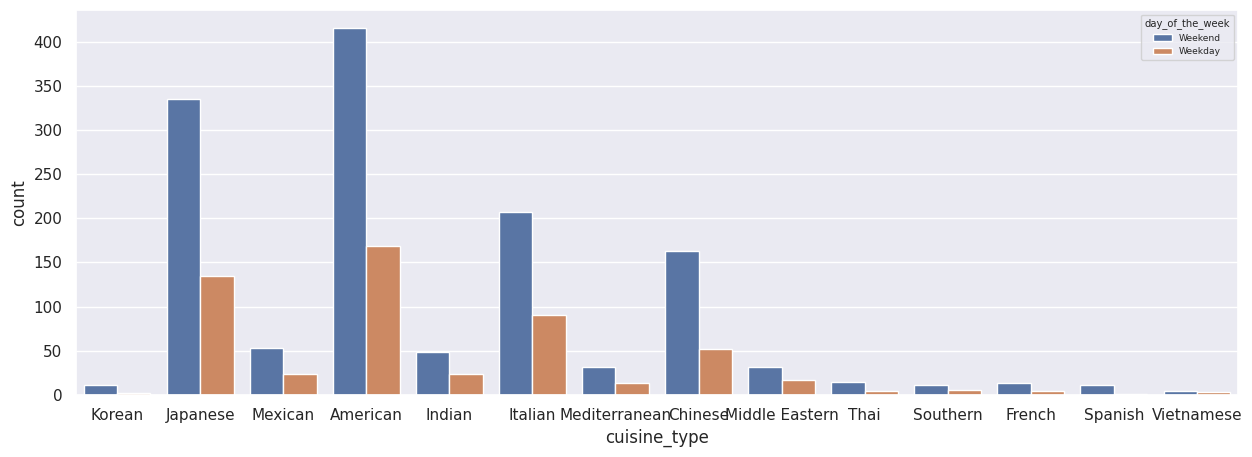

In [ ]:
 # Plot "cusine type" subdivided by "day_of_the_week".
plt.subplots(figsize = (15,5))
sns.set(font_scale=0.6)
sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.show()
print('\n')


####Observationson on cuisine type by day of the week:

#####The cusine popularity is independent of being a week or weekend day.
#####More orders are placed during the weekend.

#### **Observations on  Top 10 restaurants by cost of order, food preparation time and delivery time**

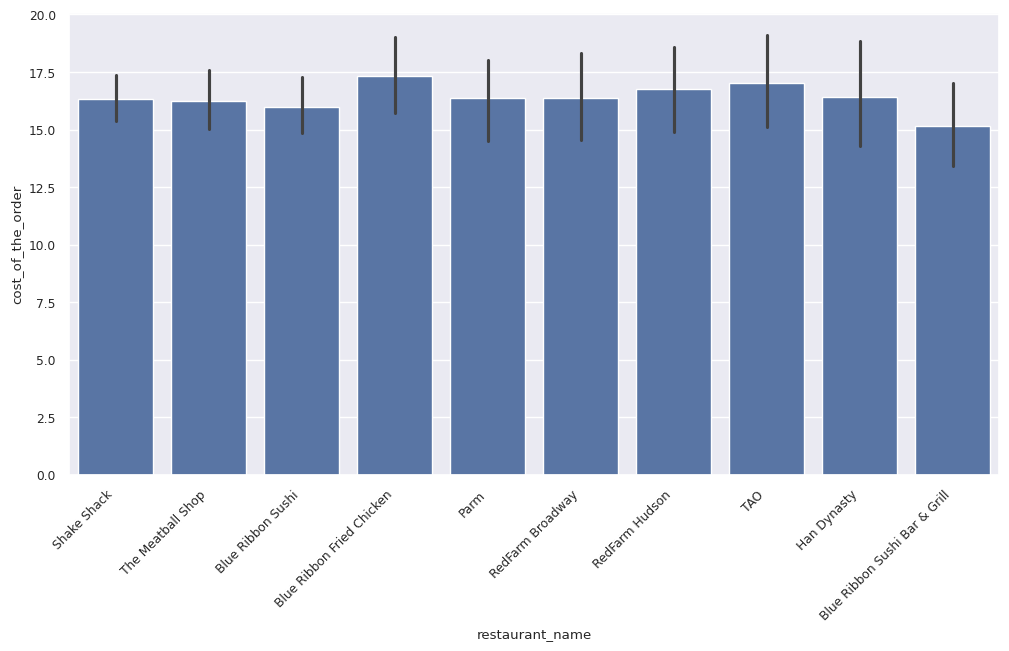

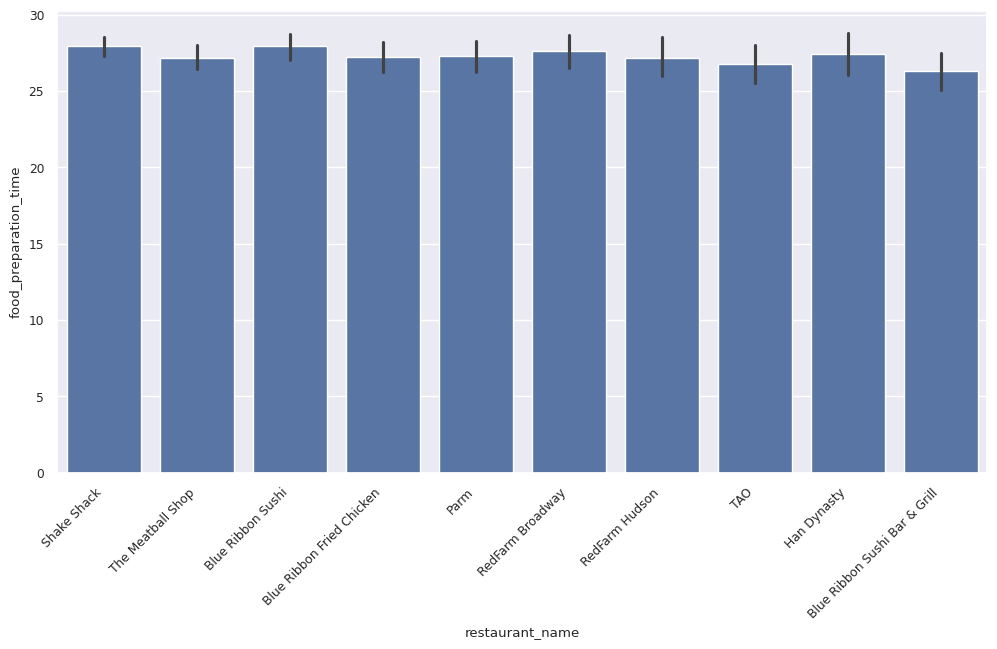

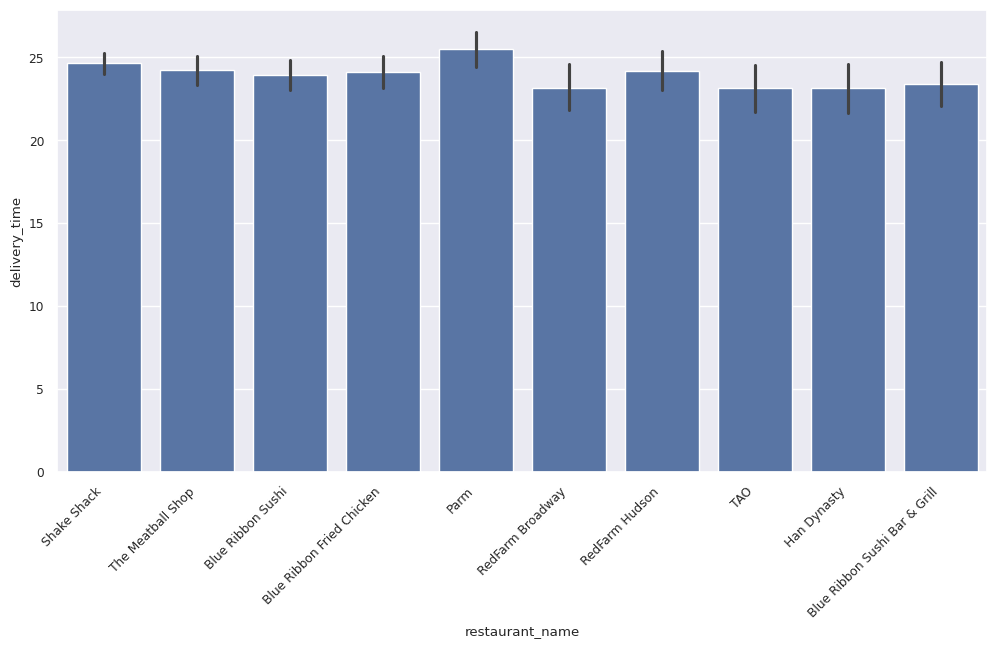

In [ ]:
# Plot top 10 restaurants by order cost.
plt.figure(figsize=(12, 6))  # Setting figure size
sns.set(font_scale=0.8)  # Setting font size
top_restaurants = df['restaurant_name'].value_counts().nlargest(10)  # Selecting top 10 restaurants
sns.barplot(data=df[df['restaurant_name'].isin(top_restaurants.index)], x="restaurant_name", y="cost_of_the_order", order=top_restaurants.index)  # Creating plot
plt.xticks(rotation=45, ha='right')  # Rotating X-axis labels for better readability
plt.show()
#Plot top 10 restaurants by food_preparation_time
plt.figure(figsize=(12, 6))  # Setting figure size
sns.set(font_scale=0.8)  # Setting font size
top_restaurants = df['restaurant_name'].value_counts().nlargest(10)  # Selecting top 10 restaurants
sns.barplot(data=df[df['restaurant_name'].isin(top_restaurants.index)], x="restaurant_name", y="food_preparation_time", order=top_restaurants.index)  # Creating plot
plt.xticks(rotation=45, ha='right')  # Rotating X-axis labels for better readability
plt.show()
#Plot top 10 restaurants by delivery_time
plt.figure(figsize=(12, 6))  # Setting figure size
sns.set(font_scale=0.8)  # Setting font size
top_restaurants = df['restaurant_name'].value_counts().nlargest(10)  # Selecting top 10 restaurants
sns.barplot(data=df[df['restaurant_name'].isin(top_restaurants.index)], x="restaurant_name", y="delivery_time", order=top_restaurants.index)  # Creating plot
plt.xticks(rotation=45, ha='right')  # Rotating X-axis labels for better readability
plt.show()

####Observations on Top 10 restaurants by cost of order, food preparation time and delivery time:
#####Blue Ribbon Fried Chicken and Tao have the highest average order costs within the top 10 restaurantes
#####Food preparation time is more or less the same in all top 10 restaurantes.
#####Among top 10 restaurants delivery time of the Parm is a bit higher than other and RedFarm Broadway a bit lower.

#### **Observations on Cuisine type by cost of order, food preparation time and delivery time**

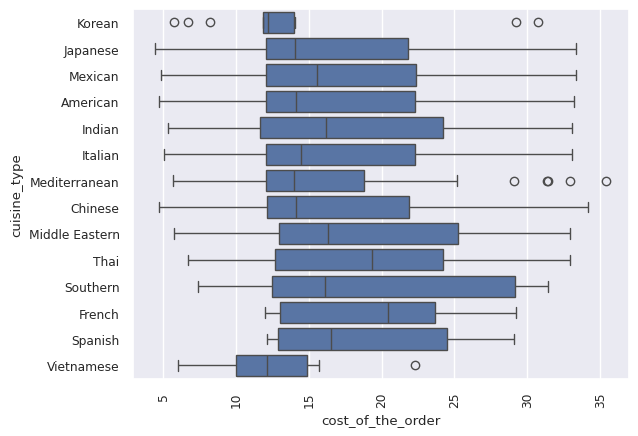

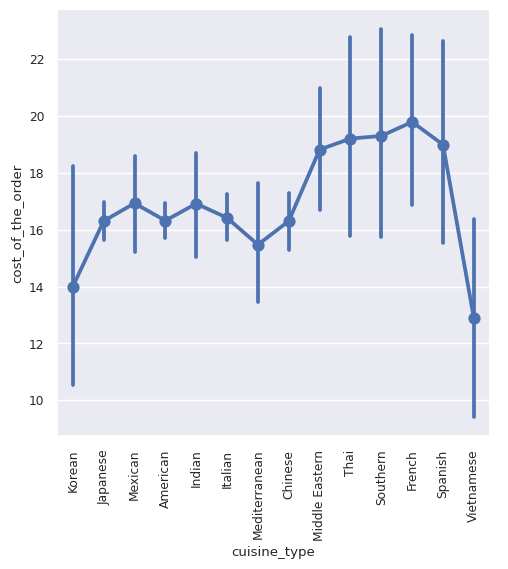

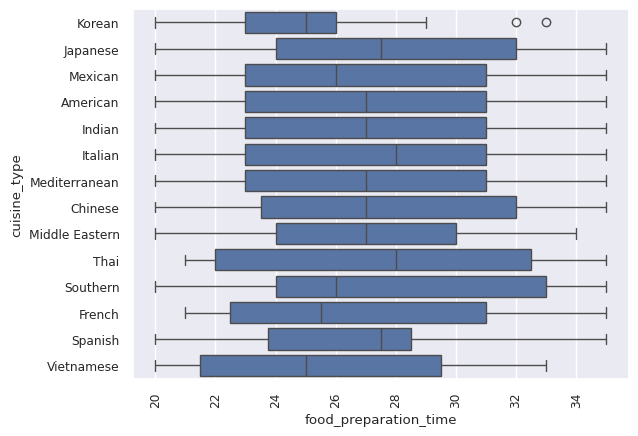

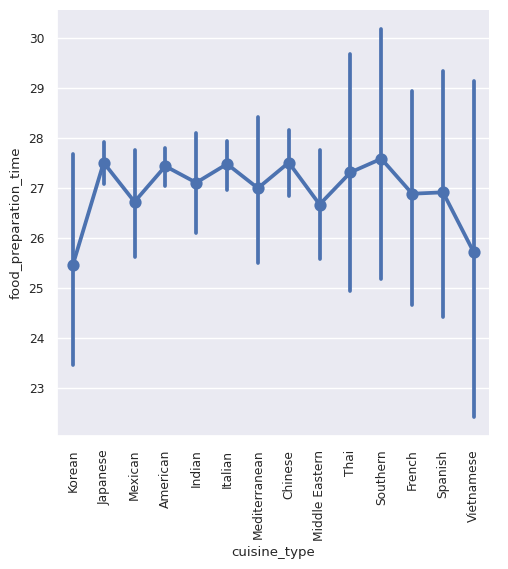

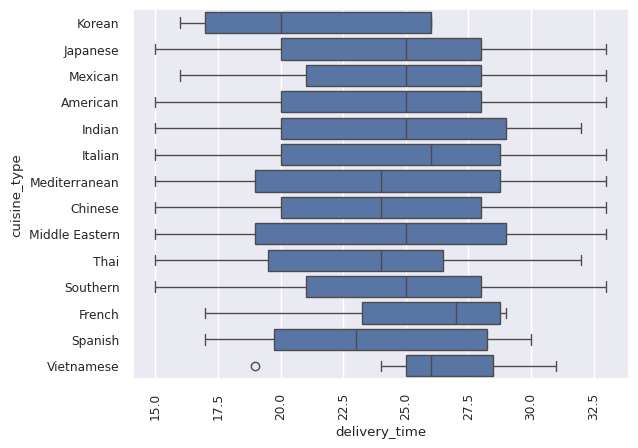

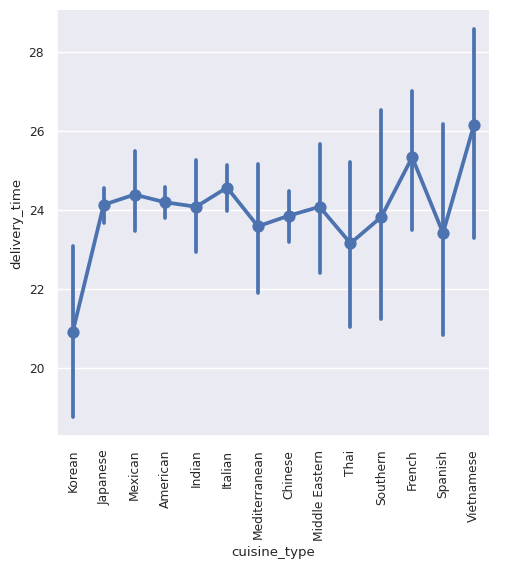

In [ ]:
sns.boxplot(data=df,x="cost_of_the_order",y="cuisine_type")
plt.xticks(rotation=90)
plt.show()
sns.catplot(data = df, x = "cuisine_type",y = "cost_of_the_order",kind = "point")
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x="food_preparation_time",y="cuisine_type")
plt.xticks(rotation=90)
plt.show()
sns.catplot(data = df, x = "cuisine_type",y = "food_preparation_time",kind = "point")
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df,x="delivery_time",y="cuisine_type")
plt.xticks(rotation=90)
plt.show()
sns.catplot(data = df, x = "cuisine_type",y = "delivery_time",kind = "point")
plt.xticks(rotation=90)
plt.show()

####Observations on Cuisine type by cost of order, food preparation time and delivery time:
#####French cusine has the highes cost per order followed by Southen, Thai, Spanish and Middle Eastern.
#####Vietnamese and Korean have the lower cost.  
#####Most cuisine types have the same average preparation time, however Vietnamese and Korean have the lower preparation time
#####Korean has the lowe delivery time while Vietnamese has the higher delivery time.

#### **Observation on cost delivery and preparation time by rating**

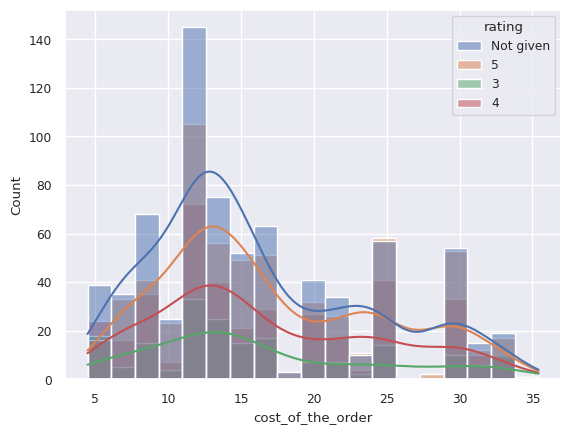

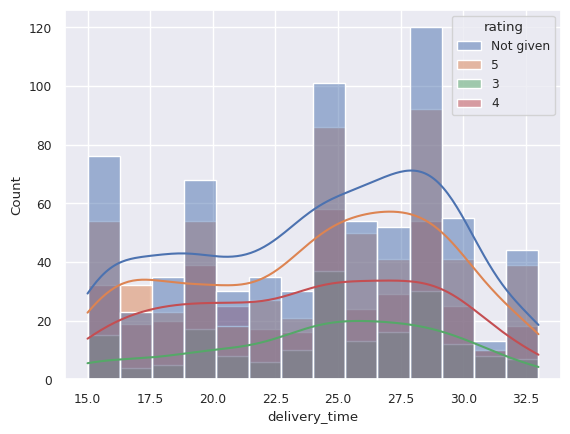

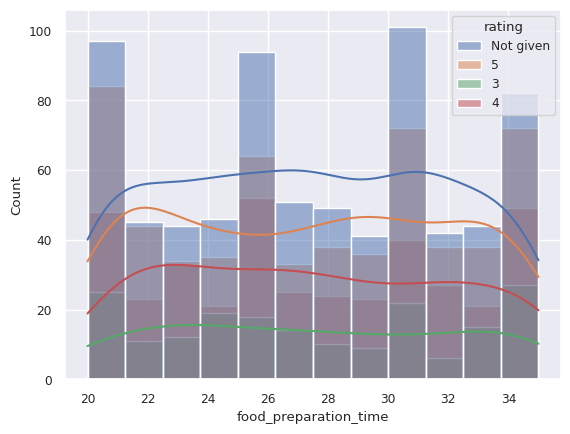

In [ ]:
# Plot cost of order by rating
sns.histplot(data=df,x='cost_of_the_order', hue='rating', kde = True)
plt.show()
print('\n')
# Plot cost delivery time by rating
sns.histplot(data=df,x="delivery_time", hue='rating', kde = True)
plt.show()
print('\n')
# Plot preparation time by rating
sns.histplot(data=df,x="food_preparation_time", hue='rating', kde = True)
plt.show()
print('\n')


#### Observations on rating and cost of orders :
##### When analyzing the relationship between rating and the cost of order, it is noticed that a significant portion of unrated orders are associated with lower costs, whereas higher-cost orders are more likely to receive ratings.
##### The majority of ratings originate from orders with an approximate cost per order of $11, which also represents the category with the highest order count.

#### **Observations on cost of order, food preparation time and delivery time and day of the week**

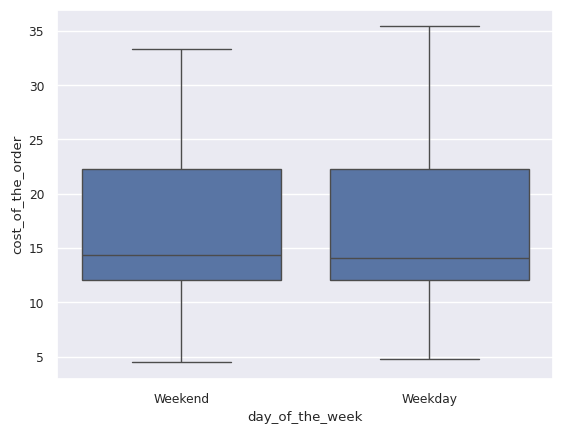

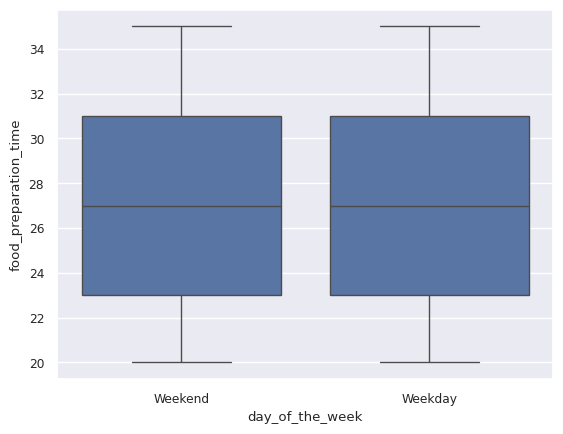

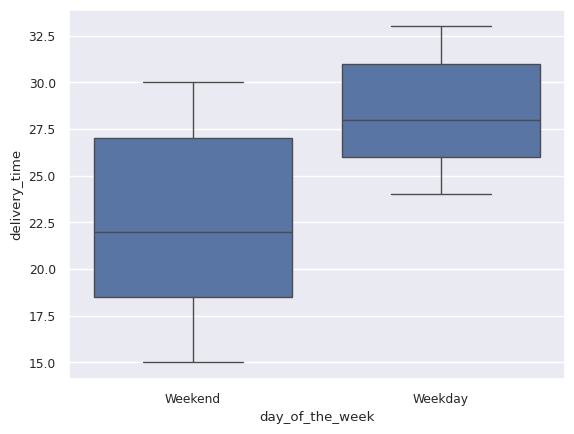

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

#### Observations on cost of order, food preparation time and delivery time by day of the week:
##### The day of the week does not affect cost of order or preparation time.  
##### Delivery time is longuer during weekend, probably related to greater trafic during week days.  

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df_copy = df[df['rating'] != 'Not given'].copy() # eliminate all orders that are not rated
df_copy['rating'] = pd.to_numeric(df_copy["rating"]) # convert rating to numeric
df_restaurant_rating = df_copy.groupby(["restaurant_name"])["rating"].aggregate(["mean","count"]) # calculate mean rating and count
df_restaurant_rating[((df_restaurant_rating['mean'] > 4) & (df_restaurant_rating['count'] > 50))] # select restaurantes with mean rating >4 and counts >50

,mean,count
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### Observations:
###### The Restaurants "Blue Ribbon Fried Chicken", "Blue Ribbon Sushi", "Shake Shack", and "The Meatball Shop",  fulfilling the criteria to get the promotional offer.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
net_revenue = 0
income = 0
order_cost = pd.Series(df['cost_of_the_order']) # Create a pandas Series named order_cost from the DataFrame
# Iterate through each element of order_cost using a for loop. Within the loop, it checks conditions to determine the income from each order
for i in range(len(order_cost)):
    if (order_cost[i] > 5) & (order_cost[i] < 20):
        income = order_cost[i]*0.15
    elif (order_cost[i] > 20):
        income = order_cost[i]*0.25
    else:
        income = 0
    net_revenue = net_revenue + income # revenue is updated by adding the income calculated in each iteration
print(round(net_revenue,2)) # print round to 2 decimal digits

6166.3


#### Observations:
##### The total revenue is 6166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df["total_delivery_time"]=df["food_preparation_time"] + df["delivery_time"]
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
total_delivery=df.total_delivery_time.count() # count total delivery
delivery_above_60= df["total_delivery_time"][df["total_delivery_time"]> 60].count() # count delivery that take more than 60 min.
percentage_above_60= (delivery_above_60/total_delivery)*100
print("Percentage of delivery that take more than 60 minutes:", round(percentage_above_60,2))

Percentage of delivery that take more than 60 minutes: 10.54


#### Observations:
##### The percentage of orders take more than 60 minutes to get delivered from the time the order is placed is 10.54 percent.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
mean_delivery_time= df.groupby("day_of_the_week")[["delivery_time"]].agg(["mean","std","count"])
mean_delivery_time

delivery_time                
                         mean       std count
day_of_the_week                              
Weekday             28.340037  2.891428   547
Weekend             22.470022  4.628938  1351

#### Observations:
##### Mean delivery time is longer during the weekdays, althoug there are more orders during the weekend. The greater delivery time during week days  might be related to greater trafic during week days but one can not exclude that there might be a different numbers of workers picking up orders during the weekdays since there is a much lower number of orders being placed.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
##### 1. Out of the rated orders, the majority has an  rating of 5. However, the dataset reveals that a significant portion of orders, 736 out of 1898 (approximately 39%), did not receive a rating. It could be worthwhile to examine whether the absence of ratings, for a considerable number of orders, could impact the distribution of ratings.
##### 2. Most orders are placed during the weekend and have a lower time of  delivery.
##### 3.The majority of orders are from 4 different cuisine types (American, Japanese, Italian and Chinese) and orders by cusine type are independent of being a week or weekend day
##### 4. The top five most expencive cusines are the French Southen, Thai, Spanish and Middle Eastern ofering a possible higher revenue.  

### Recommendations:

#####1. Conduct further analysis to understand the reasons behind the lack of ratings for a significant portion of orders.Potential root causes that could contribute to the lack of ratings for a significant portion of orders:
*  Customers may find it inconvenient to provide ratings, especially if the process is not user-friendly. Issues such as complicated rating systems, long surveys, or unclear instructions could discourage customers from leaving feedback.
* Customers may not see any immediate benefit or incentive to provide ratings. Without rewards or recognition for leaving feedback, they may not feel motivated to do so.
* Customers may forget to provide ratings after their order has been delivered, especially if they receive it during busy times. Additionally, customers may not see the relevance or importance of providing feedback, especially if their order was satisfactory and met their expectations.
* Some customers may choose not to leave ratings if they were dissatisfied with their order or experience.
* Customers may not be aware that they can leave ratings or may not understand the importance of their feedback in improving the quality of service.

#####To address these issues facilitate and  encourage customers to provide ratings:
* Simplify the rating process by making it easy and intuitive for customers to leave feedback.
* Provide incentives such as discounts
* Send follow-up notifications to customers shortly after their order has been delivered, prompting them to leave a rating while the experience is still fresh in their minds.
* Raise awareness about the importance of ratings and how they contribute to improving the overall customer experience.

#####2. Investigate whether high delivery times contribute to low orders during weekdays by gathering  feedback from customers regarding their ordering habits and reasons for choosing certain delivery times.
##### 3. Determine if weekday traffic is indeed the cause of longer delivery times, if so implement operational improvements to mitigate the impact of traffic on delivery.
##### 4.To increase orders during weekdays, consider implementing the following recommendations:
* Offer weekday-specific promotions, discounts, or meal deals to incentivize customers to order during the week.
* Create targeted marketing campaigns to promote weekday ordering.
* Implement a loyalty program that rewards customers for ordering during weekdays.
##### 5. Given the higher cost/ revenue associated with certain cuisines such as French Southern, Thai, Spanish, and Middle Eastern, explore ways to highlight the unique value proposition of these cuisines to customers. Consider implementing targeted marketing campaigns or special promotions to attract customers interested in these types of cusine.


In [ ]:
!pip install nbconvert

---

In [ ]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = '/content/drive/MyDrive/Colab Notebooks/MIT_WEEK1/Project_FOOD_HUB/FDS_Project_LearnerNotebook_FullCode.ipynb'
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(nb)

# Write the HTML output to a file
output_file_path = '/content/drive/MyDrive/Colab Notebooks/MIT_WEEK1/Project_FOOD_HUB/FDS_Project_LearnerNotebook_FullCode.html'
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(body)